In [217]:
import pandas as pd
import numpy as np

import os
import sys
import re

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import custom_util as util

In [165]:
base_dir = os.path.split(os.getcwd())[0]
base_dir

'c:\\Users\\WHNP83\\OneDrive\\Documents\\GitHub\\MAJOR_PROJECT'

In [166]:
Ravdess = os.path.join(base_dir, 'ravdess')
print(Ravdess)

Crema = os.path.join(base_dir, 'crema', 'AudioWAV')
print(Crema)
crema_emotions = {
    'NEU': 'neutral',
    'HAP': 'happy',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fear',
    'DIS': 'disgust'
}

Savee = os.path.join(base_dir, 'surrey', 'ALL')
print(Savee)
savee_emotions = {
    'n': 'neutral',
    'h': 'happy',
    'sa': 'sad',
    'su': 'surprise',
    'a': 'angry',
    'f': 'fear',
    'd': 'disgust'
}

Tess = os.path.join(base_dir, 'tess', 'TESS Toronto emotional speech set data')
print(Tess)


c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\ravdess
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\surrey\ALL
c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\tess\TESS Toronto emotional speech set data


## CREMA
___

In [168]:
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    emotion = file.split('_')[2]
    if emotion in crema_emotions:
        file_emotion.append(crema_emotions[emotion])
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df

Emotions                                               Path
0       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1     disgust  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2        fear  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3       happy  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4     neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
...       ...                                                ...
7472  disgust  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
7473     fear  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
7474    happy  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
7475  neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
7476      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...

[7477 rows x 2 columns]

``` The first audio file in the dataset CREMA ```

In [221]:
util.get_audio_by_index(Crema_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_ANG_XX.wav


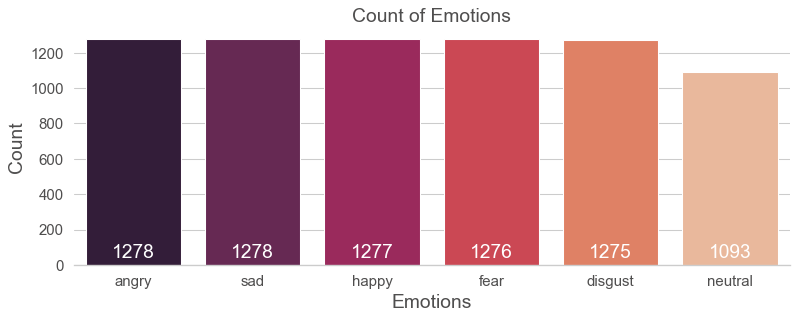

In [220]:
util.print_emotion_count(Crema_df)

https://blog.dataiku.com/speech-emotion-recognition-deep-learning#:~:text=We%20are%20going%20to%20explore%20a%20speech%20emotion,Let%E2%80%99s%20start%20by%20uploading%20the%20dataset%20in%20Dataiku.

https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio

https://devopedia.org/audio-feature-extraction

https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition

## TESS
___

In [171]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
       
        part = file.split('.')[0]
        part = part.split('_')[2]
        
        if part == 'ps':
            file_emotion.append('surprise')
        elif part == 'happy(1)':
            file_emotion.append('happy')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df

Emotions                                               Path
0       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
...       ...                                                ...
2805      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2806      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2807      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2808      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2809      sad  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...

[2810 rows x 2 columns]

``` The first audio file found in the dataset TESS ```

In [172]:
util.get_audio_by_index(Tess_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\tess\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


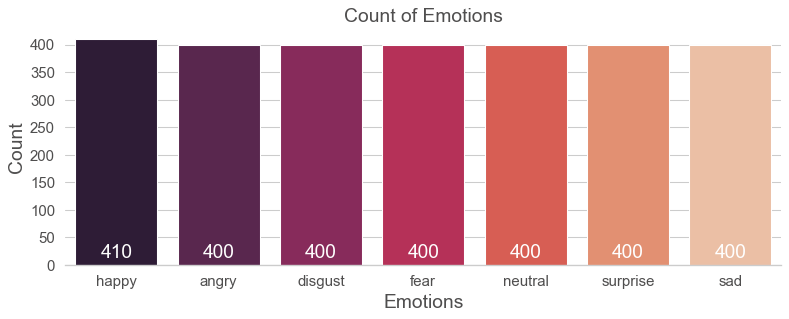

In [173]:
util.print_emotion_count(Tess_df)

## RAVDESS
___

In [174]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace(
    {
        1 : 'neutral',
        2 : 'calm',
        3 : 'happy',
        4 : 'sad',
        5 : 'angry',
        6 : 'fear',
        7 : 'disgust',
        8 : 'surprise'
    }, 
    inplace=True)
    
Ravdess_df

Emotions                                               Path
0      neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1      neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2      neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3      neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4         calm  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
...        ...                                                ...
1435  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1436  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1437  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1438  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1439  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...

[1440 rows x 2 columns]

``` The first audio file found in the dataset RAVDESS ```

In [175]:
util.get_audio_by_index(Ravdess_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\ravdess\Actor_01\03-01-01-01-01-01-01.wav


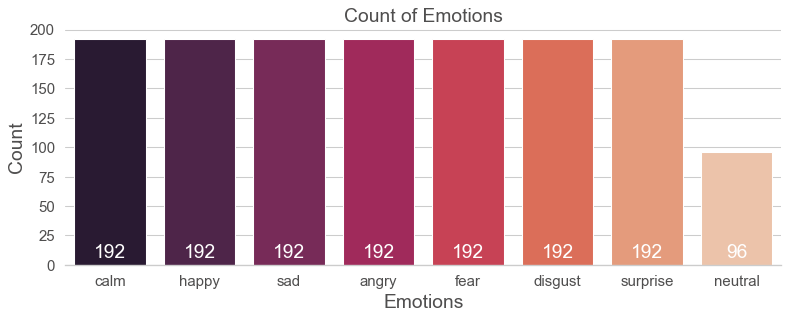

In [176]:
util.print_emotion_count(Ravdess_df)

## SAVEE
___

In [177]:
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    file_emotion.append(savee_emotions[re.search(r'\w\w_(\w+)\d\d', file)[1]])
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df

Emotions                                               Path
0       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
..        ...                                                ...
475  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
476  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
477  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
478  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
479  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...

[480 rows x 2 columns]

``` The first audio file found in the dataset SAVEE ```

In [178]:
util.get_audio_by_index(Savee_df, 0)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\surrey\ALL\DC_a01.wav


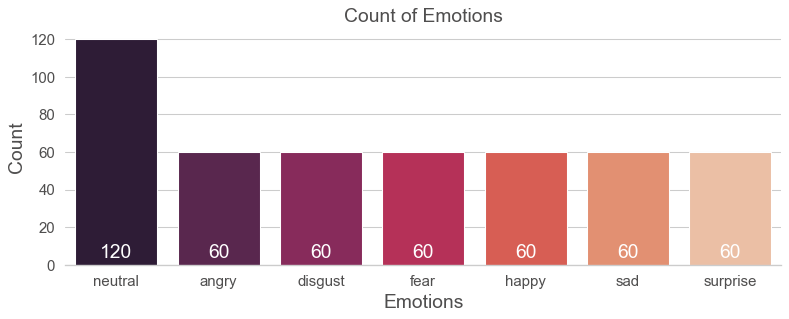

In [179]:
util.print_emotion_count(Savee_df)

___
## Data Visualisation and Exploration

In [180]:
# combining all datasets into one
data_path = pd.concat([Crema_df, Tess_df, Ravdess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv", index = False)
data_path

Emotions                                               Path
0       angry  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
1     disgust  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
2        fear  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
3       happy  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
4     neutral  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
..        ...                                                ...
475  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
476  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
477  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
478  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...
479  surprise  c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJO...

[12207 rows x 2 columns]

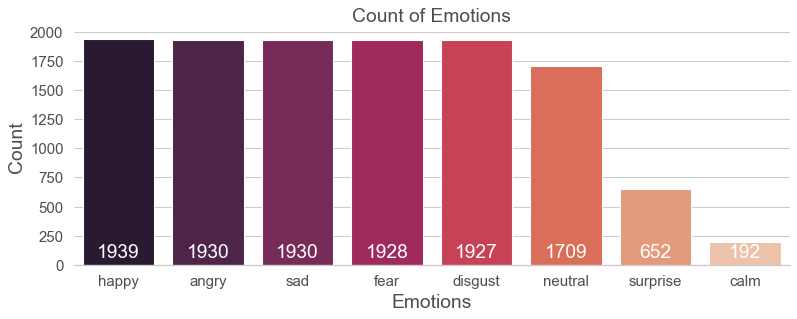

In [181]:
util.print_emotion_count(data_path)

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_HAP_XX.wav


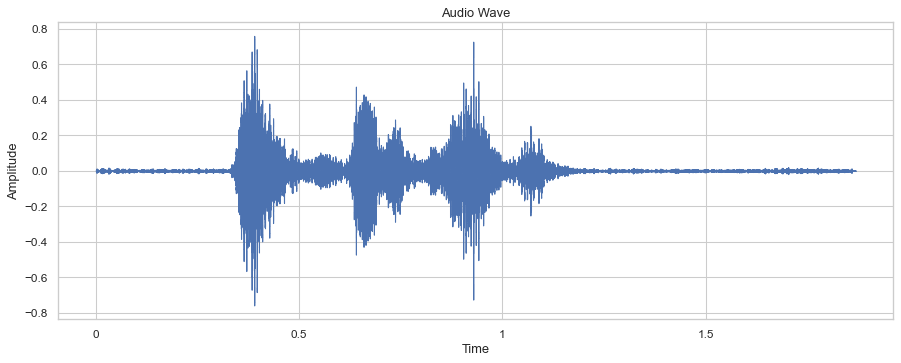

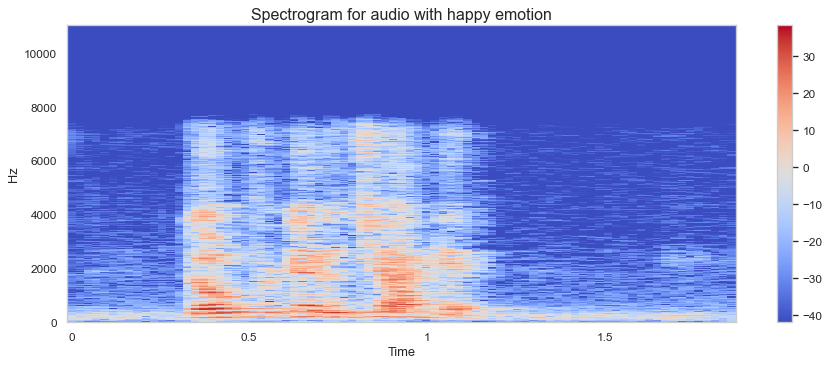

In [224]:
util.get_audio(data_path, 'happy')
util.create_waveplot(data_path, 'happy')
util.create_spectrogram(data_path, 'happy')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_ANG_XX.wav


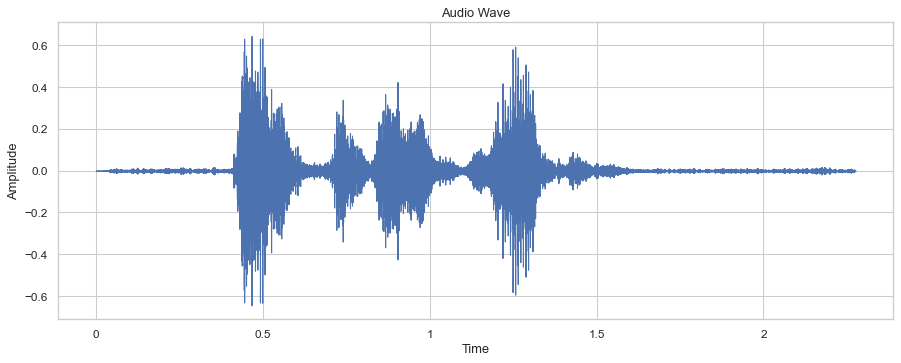

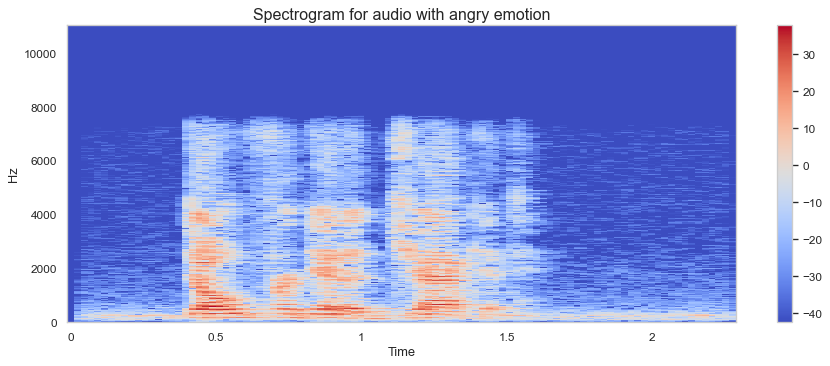

In [183]:
util.get_audio(data_path, 'angry')
util.create_waveplot(data_path, 'angry')
util.create_spectrogram(data_path, 'angry')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_SAD_XX.wav


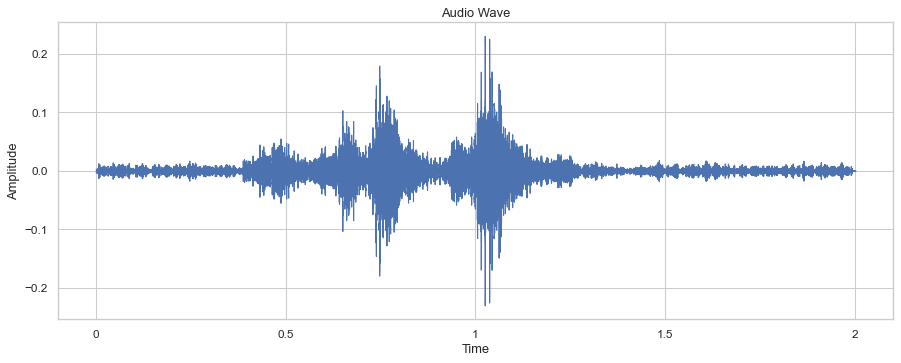

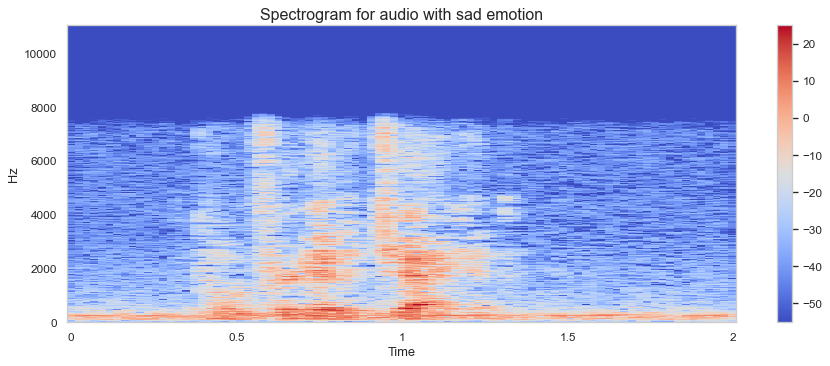

In [184]:
util.get_audio(data_path, 'sad')
util.create_waveplot(data_path, 'sad')
util.create_spectrogram(data_path, 'sad')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_FEA_XX.wav


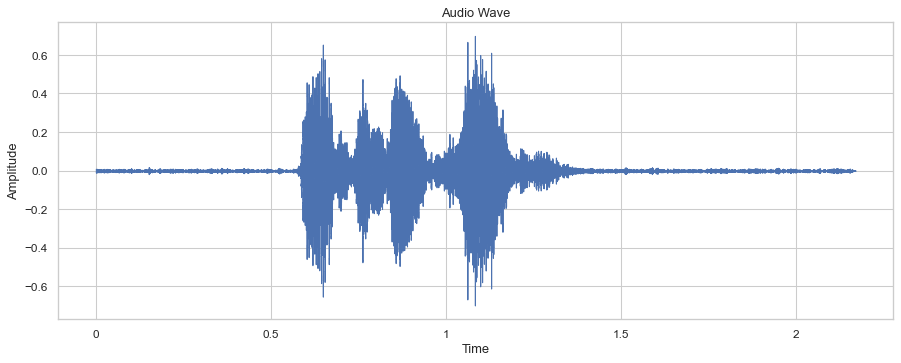

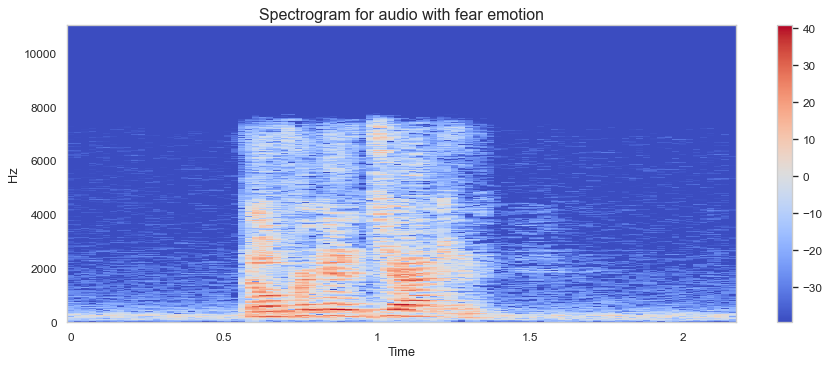

In [185]:
util.get_audio(data_path, 'fear')
util.create_waveplot(data_path, 'fear')
util.create_spectrogram(data_path, 'fear')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_DIS_XX.wav


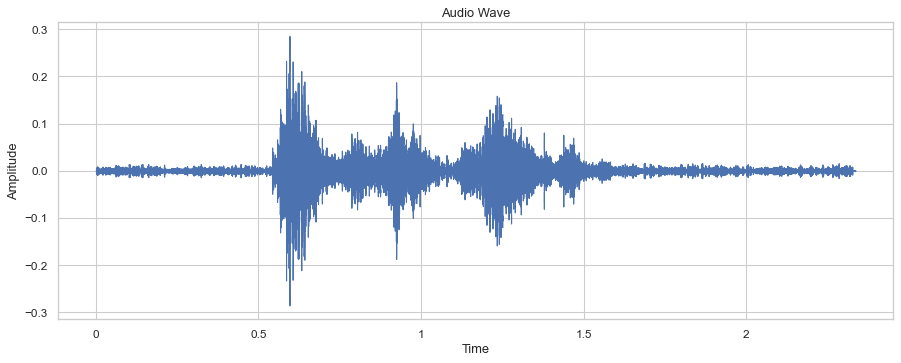

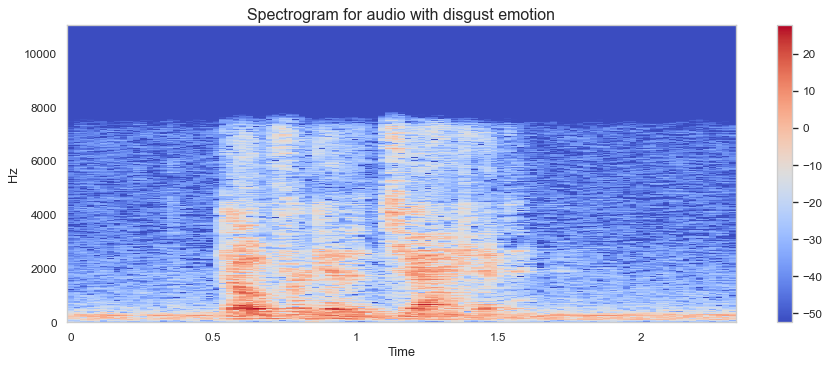

In [186]:
util.get_audio(data_path, 'disgust')
util.create_waveplot(data_path, 'disgust')
util.create_spectrogram(data_path, 'disgust')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\crema\AudioWAV\1001_DFA_NEU_XX.wav


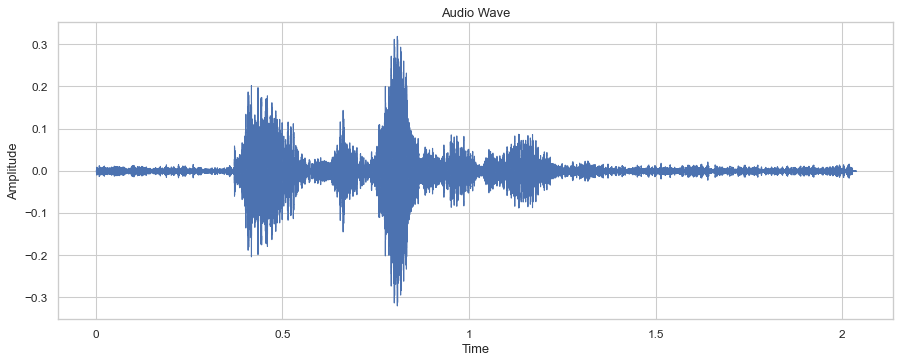

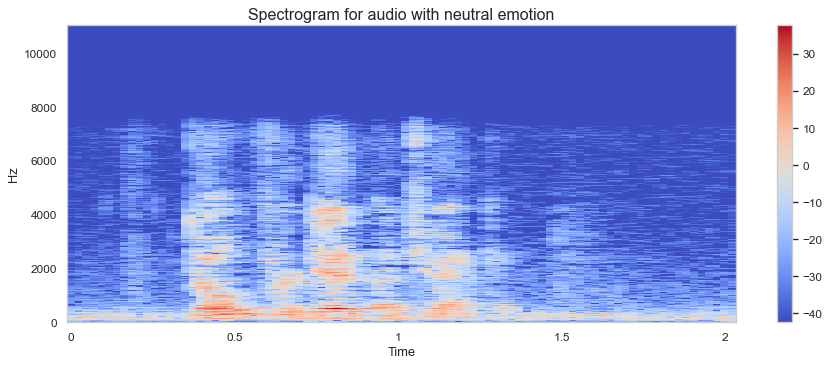

In [187]:
util.get_audio(data_path, 'neutral')
util.create_waveplot(data_path, 'neutral')
util.create_spectrogram(data_path, 'neutral')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\tess\TESS Toronto emotional speech set data\OAF_Pleasant_surprise\OAF_back_ps.wav


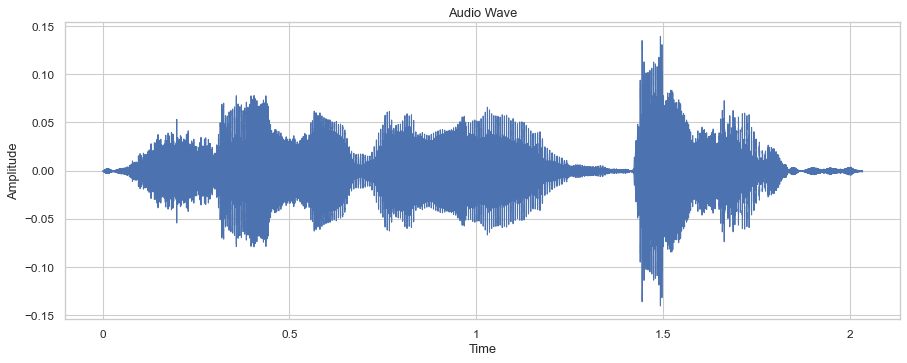

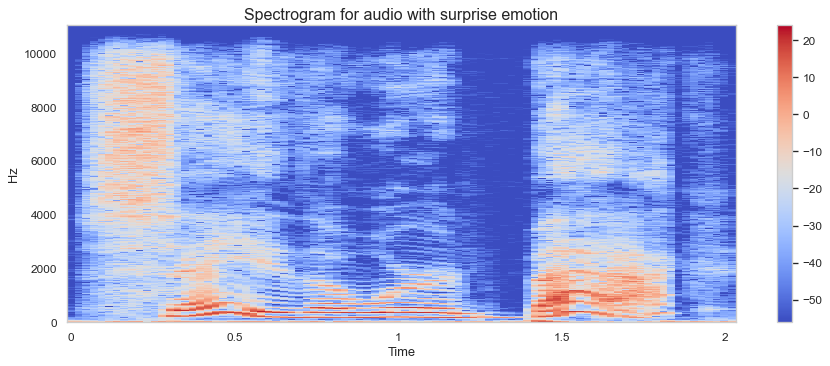

In [188]:
util.get_audio(data_path, 'surprise')
util.create_waveplot(data_path, 'surprise')
util.create_spectrogram(data_path, 'surprise')

c:\Users\WHNP83\OneDrive\Documents\GitHub\MAJOR_PROJECT\ravdess\Actor_01\03-01-02-01-01-01-01.wav


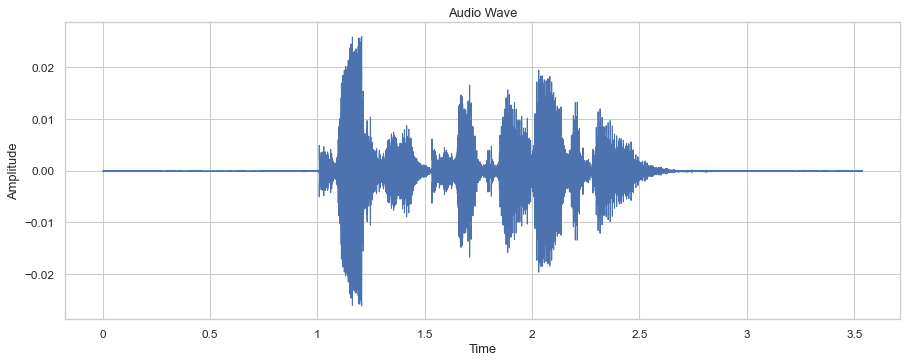

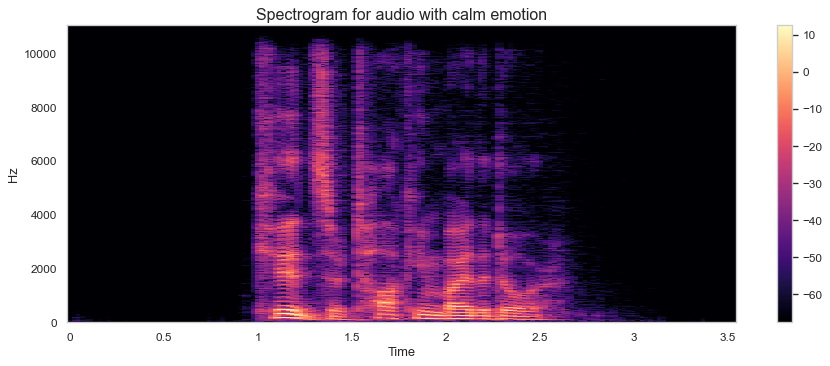

In [225]:
util.get_audio(data_path, 'calm')
util.create_waveplot(data_path, 'calm')
util.create_spectrogram(data_path, 'calm')

In [190]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

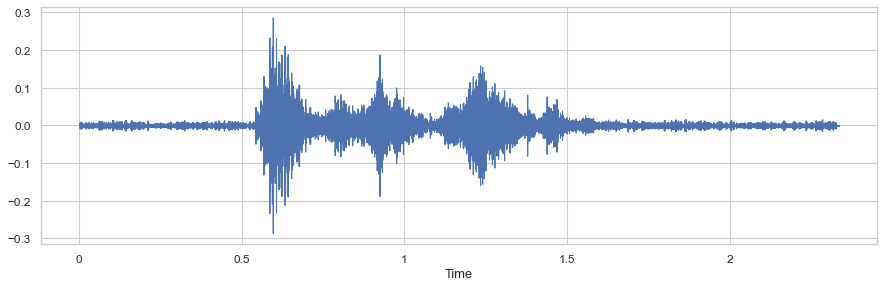

In [191]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

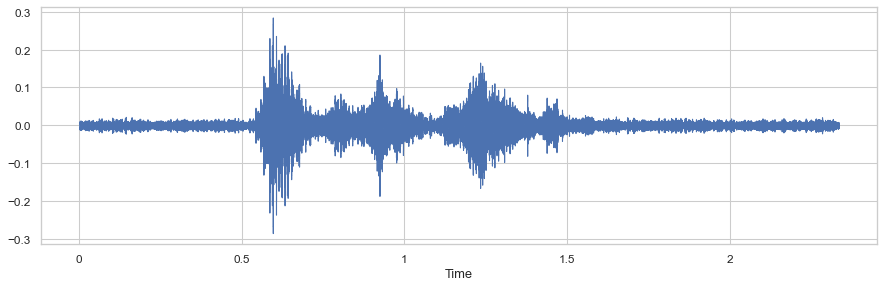

In [192]:
#noise
x = util.noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

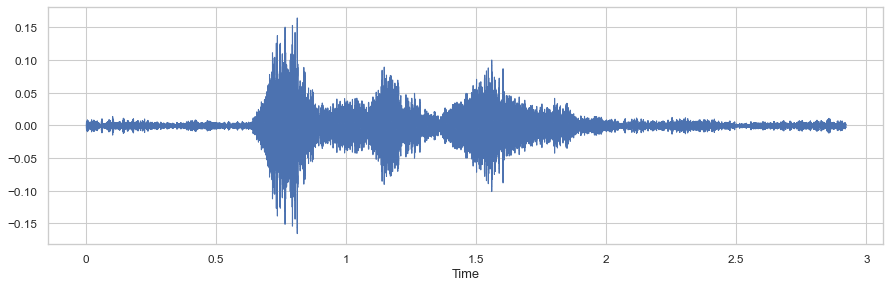

In [193]:
#stretch
x = util.stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

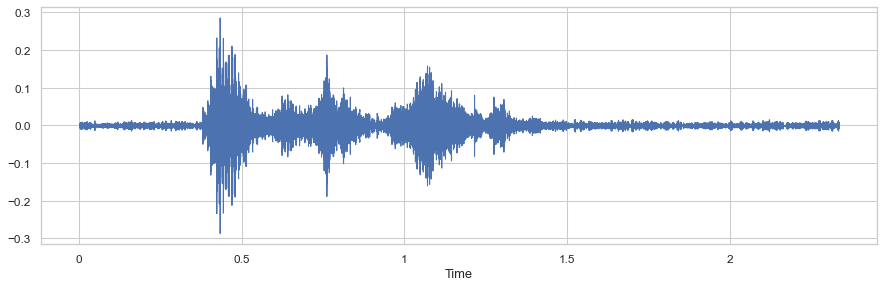

In [222]:
#shift
x = util.shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

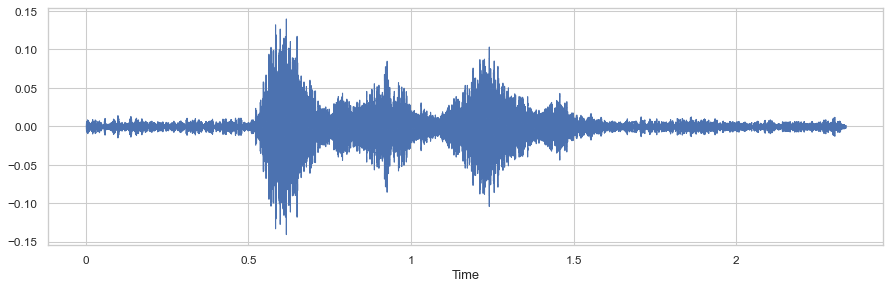

In [223]:
#pitch
x = util.pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)